# **NAME : SUMANTH NAYAK**

#**TASK 2 : TO EXPLORE SUPERVISED MACHINE LEARNING**

#**OBJECTIVE:PREDICTED SCORE IF A STUDENT STUDIES 9.25 HRS A DAY** 


  Regression analysis is a powerful statistical method that allows us to examine the relationhip between two or more variables. While there are many types of regression analysis, at their core we all examine is the influence of one or more independent variables on a dependent variable. In the tast#2 data set, the dependent variable is Score of the students and the independent variable is the Hours the students study. The objective of our analysis is to determine and predict the score of the student who studies 9.25 hrs.

#**1. IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd 
import math 
import numpy as np 
from sklearn import linear_model 
import seaborn as sns 
import pandas.testing as tm 
import matplotlib.pyplot as plt

These libraries are powerful to perform any computations, fit a model and provide relevant data visualisation.

---





#**2. UPLOADING THE DATA SET**

In [ ]:
df=pd.read_csv('http://bit.ly/w-data')

#**3. CHECKING THE HEAD AND TAIL**

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.info # Looking at the whole data set information

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

#**4. CHECKING THE DATA TYPE OF THE VARIABLES**

In [ ]:
df.dtypes # Looking for unknown data types

Hours     float64
Scores      int64
dtype: object

#**5. CHECKING FOR MISSING VALUES**

In [ ]:
df.isnull().sum() # Checking for null values

Hours     0
Scores    0
dtype: int64

During any analysis it becomes very important for an analyst to check for any non-zero values or any special characters or anything which is irrelavant entry within the data set

#**6. CHECKING BASIC ATTRIBUTES**

In [ ]:
df.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Compare mean and 50% (2nd quartile / Median) and check for variation. The values within the variables are normally distributed if the gap is less

#**7. CORRELATION BETWEEN HOURS AND SCORES**

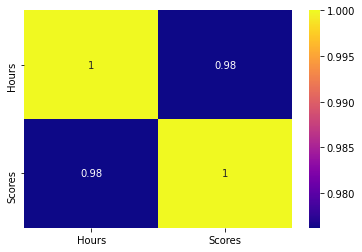

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, cmap='plasma', annot=True)

The above chart clearly indicates there exists a high correlation between Hours and Scores and the correlation is positive, since the value is close to 1.

#**8. Regression Plot Between Hours and Scores**

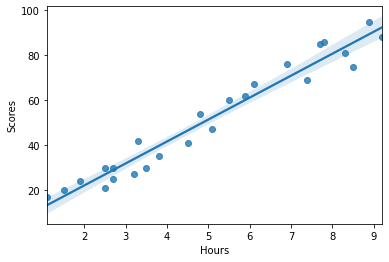

In [ ]:
sns.regplot(x = 'Hours', y = 'Scores', data = df) 
plt.show()

The above chart indicated there is a positive linear repationship between the number of Hours a student studies and scores obtained. This allows us to fit the regression model.

#**9. TRAINING THE DATA**

In [ ]:
x = df[['Hours']]
y = df['Scores']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=45)

The best way to predict the result is training 70% of the dataset and testing with the remaining 30%. This provides accuracy within the model and is expected to give less error.

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)
print('training complete')

training complete


We can also find the regression equation for the train data set

In [ ]:
reg.intercept_

1.2162641848495213

In [ ]:
reg.coef_

array([9.81092414])

From the above intercet and slope, the regression equation is **y = 1.216 x + 9.81**


In [ ]:
print(x_test)
y_pred = reg.predict(x_test)
y_pred


    Hours
16    2.5
20    2.7
13    3.3
10    7.7
17    1.9
24    7.8
22    3.8
19    7.4


array([25.74357453, 27.70575935, 33.59231384, 76.76038004, 19.85702004,
       77.74147245, 38.4977759 , 73.8171028 ])

#**10. Comparing Actual VS Predicted Scores**


In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
16,30,25.743575
20,30,27.705759
13,42,33.592314
10,85,76.760380
17,24,19.857020
24,86,77.741472
22,35,38.497776
19,69,73.817103


We observe there is little difference between the actual and the predicted Scores. This supports the argument that the predicted model is the best fit and we may proceed with predicting our objective.

#**11. PREDICTING THE SCORE**

In [ ]:
hours = float(input('Enter the total number of hours studied : '))
cls_predict = reg.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Scores for studing total number of hours = {:.3f}%".format(cls_predict[0]))

Enter the total number of hours studied : 9.25
No of Hours = 9.25
Predicted Scores for studing total number of hours = 91.967%


#RESULT :  PREDICTED SCORE IF A STUDENT STUDIES 9.25 HRS A DAY IS 91.967%